In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: str
    final: str

In [4]:
def adder(state:AgentState) -> AgentState:
    "This will add two numbers"
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state:AgentState) -> AgentState:
    "This will add two numbers"
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state:AgentState) -> AgentState:

    "Decide which operation to perform"
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"

In [5]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state)  #passthrough func

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        #Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)    

app = graph.compile()


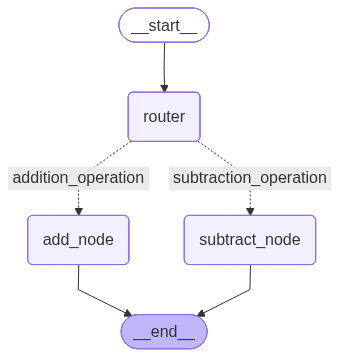

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
initial_state_1 = AgentState(number1 = 10, operation="-", number2 = 5)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 5}


In [8]:
result = app.invoke({"number1": 10, "operation": "-", "number2": 5})
print(result)

{'number1': 10, 'operation': '-', 'number2': 5}
